# Notebook for OpenAIJsonModelFlow

In this example, we will show you how to generate question-answers (QAs) from give text strings using OpenAI's models via uniflow's [OpenAIJsonModelFlow](https://github.com/CambioML/uniflow/blob/main/uniflow/flow/model_flow.py#L125).

### Before running the code

You will need to `uniflow` conda environment to run this notebook. You can set up the environment following the instruction: https://github.com/CambioML/uniflow/tree/main#installation.

Next, you will need a valid [OpenAI API key](https://platform.openai.com/api-keys) to run the code. Once you have the key, set it as the environment variable `OPENAI_API_KEY` within a `.env` file in the root directory of this repository. For more details, see this [instruction](https://github.com/CambioML/uniflow/tree/main#api-keys)

### Update system path

In [5]:
%reload_ext autoreload
%autoreload 2

import sys

sys.path.append(".")
sys.path.append("..")
sys.path.append("../..")

### Import dependency

In [6]:
from dotenv import load_dotenv
from IPython.display import display

from uniflow.flow.client import TransformClient
from uniflow.flow.flow_factory import FlowFactory
from uniflow.flow.config import TransformOpenAIConfig
from uniflow.op.model.model_config import OpenAIModelConfig
from uniflow.viz import Viz
from uniflow.op.prompt import PromptTemplate, Context

load_dotenv()

True

### List all the available flows

In [7]:
FlowFactory.list()

{'extract': ['ExtractPDFFlow', 'ExtractTxtFlow'],
 'transform': ['TransformCopyFlow',
  'TransformHuggingFaceFlow',
  'TransformLMQGFlow',
  'TransformOpenAIFlow']}

### Prepare sample prompts

First, we need to demonstrate sample prompts for LLM, including a custom instruction and some sample prompts.

First we giving the custom instruction `PromptTemplate` class.

In [8]:
guided_prompt = PromptTemplate(
    instruction="Generate one question and its corresponding answer based on the context. Follow the format of the examples below to include context, question, and answer in the response in json",
    few_shot_prompt=[
            Context(
                context="The quick brown fox jumps over the lazy black dog.",
                question="What is the color of the fox?",
                answer="brown.",
            ),
            Context(
                context="The quick brown fox jumps over the lazy black dog.",
                question="What is the color of the dog?",
                answer="black.",
            ),
        ],
)

Second, we craft some dummy sample raw text strings.

In [9]:
raw_context_input = [
    "It was a sunny day and the sky color is blue.",
    "My name is bobby and I am a talent software engineer working on AI/ML.",
]

Next, for the given raw text strings `raw_context_input` above, we convert them to the `Context` class to be processed by `uniflow`.

In [10]:
input_data = [
    Context(context=c)
    for c in raw_context_input
]

### Use LLM to generate data

In this example, we will use the [OpenAIModelConfig](https://github.com/CambioML/uniflow/blob/main/uniflow/model/config.py#L17)'s default LLM to generate questions and answers.

Here, we pass in our `guided_prompt` to the `OpenAIConfig` to use our customized instructions and examples, instead of the `uniflow` default ones.

We also want to get the response in the `json` format instead of the `text` default, so we set the `response_format` to `json_object`.

In [11]:
config = TransformOpenAIConfig(
    prompt_template=guided_prompt,
    model_config=OpenAIModelConfig(
        response_format={"type": "json_object"}
    ),
)
client = TransformClient(config)

Now we call the `run` method on the `client` object to execute the question-answer generation operation on the data shown above.

In [12]:
output = client.run(input_data)
output

100%|██████████| 2/2 [00:02<00:00,  1.44s/it]


[{'output': [{'response': [{'context': 'It was a sunny day and the sky color is blue.',
      'question': 'What is the color of the sky?',
      'answer': 'blue.'}],
    'error': 'No errors.'}],
  'root': <uniflow.node.Node at 0x110c76200>},
 {'output': [{'response': [{'context': 'My name is bobby and I am a talented software engineer working on AI/ML.',
      'question': "What is Bobby's profession?",
      'answer': 'software engineer working on AI/ML.'}],
    'error': 'No errors.'}],
  'root': <uniflow.node.Node at 0x110c763b0>}]

### View the output

Let's take a look of the generated output.

In [13]:
output[0]['output'][0]

{'response': [{'context': 'It was a sunny day and the sky color is blue.',
   'question': 'What is the color of the sky?',
   'answer': 'blue.'}],
 'error': 'No errors.'}

## Plot model flow graph

In [14]:
graph = Viz.to_digraph(output[0]['root'])

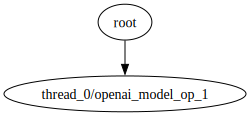

In [15]:
display(graph)

In [16]:
graph = Viz.to_digraph(output[1]['root'])

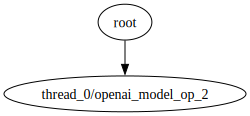

In [17]:
display(graph)